In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
sales = pd.read_csv('../data/raw/sales_train.csv', parse_dates=['date'], dayfirst=True)
items = pd.read_csv('../data/raw/items.csv')
item_categories = pd.read_csv('../data/raw/item_categories.csv')
shops = pd.read_csv('../data/raw/shops.csv')

# Clean column names
sales.columns = sales.columns.str.strip()
items.columns = items.columns.str.strip()
item_categories.columns = item_categories.columns.str.strip()
shops.columns = shops.columns.str.strip()


In [2]:
# Check for null values
print(sales.isnull().sum())

# Descriptive statistics
print(sales.describe())

# Date range
print(f"Date range: {sales['date'].min()} to {sales['date'].max()}")


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03
Date range: 2013-01-01 00:00:00 to 2015-10-31 00:00:00


In [3]:
# Remove outliers
sales = sales[(sales['item_price'] > 0) & (sales['item_price'] < 100000)]
sales = sales[(sales['item_cnt_day'] > 0) & (sales['item_cnt_day'] < 1000)]


In [4]:
# Merge sales with items to get item_category_id
sales_items = pd.merge(sales, items, on='item_id')

# Merge with item_categories to get category names
item_cat_sales = pd.merge(sales_items, item_categories, on='item_category_id')

# Optional: Merge with shops for shop names
sales_full = pd.merge(item_cat_sales, shops, on='shop_id')

# Preview merged data
item_cat_sales.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-23,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-20,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-02,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-03,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


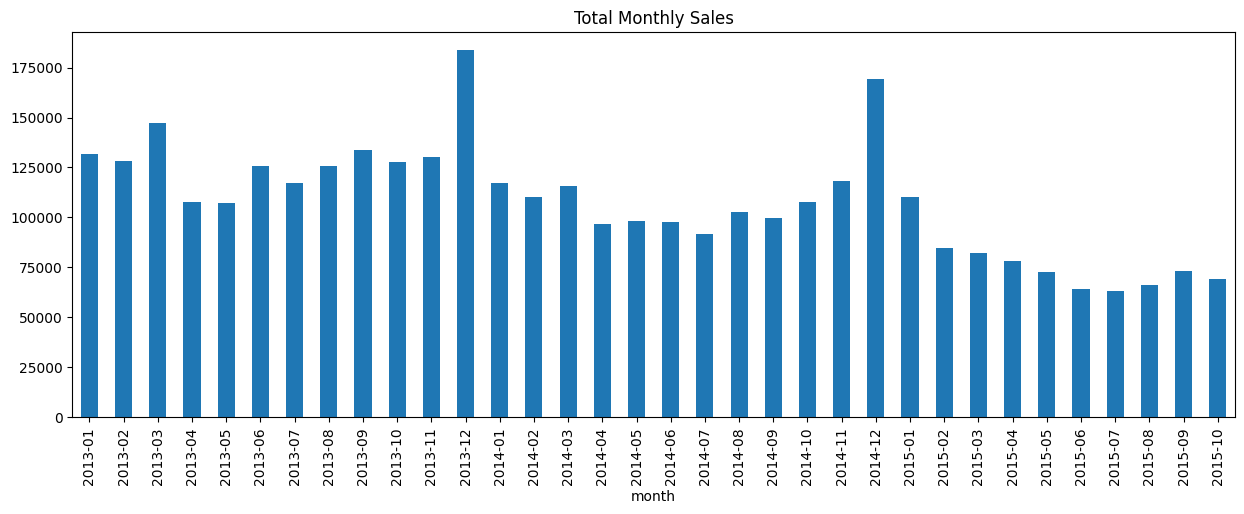

In [5]:
# Add 'month' column
sales['month'] = sales['date'].dt.to_period('M')

# Aggregate monthly sales
monthly_sales = sales.groupby('month')['item_cnt_day'].sum()
monthly_sales.plot(kind='bar', figsize=(15,5), title='Total Monthly Sales')
plt.show()


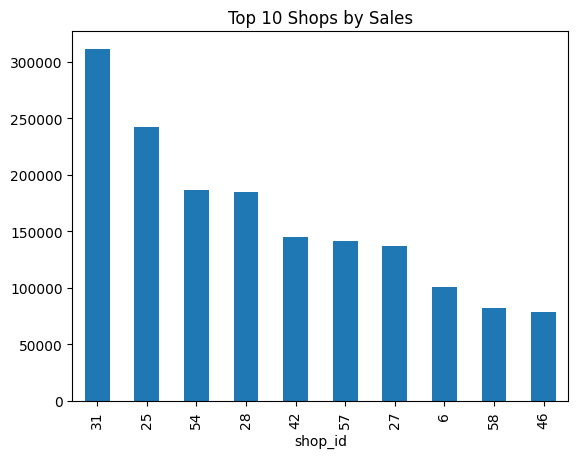

In [6]:
# Top shops by sales
shop_sales = sales.groupby('shop_id')['item_cnt_day'].sum().sort_values(ascending=False)
shop_sales.head(10).plot(kind='bar', title='Top 10 Shops by Sales')
plt.show()


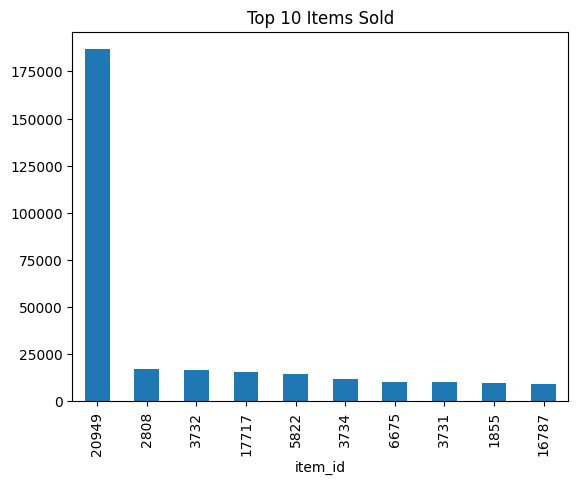

In [7]:
# Top selling items
top_items = sales.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', title='Top 10 Items Sold')
plt.show()


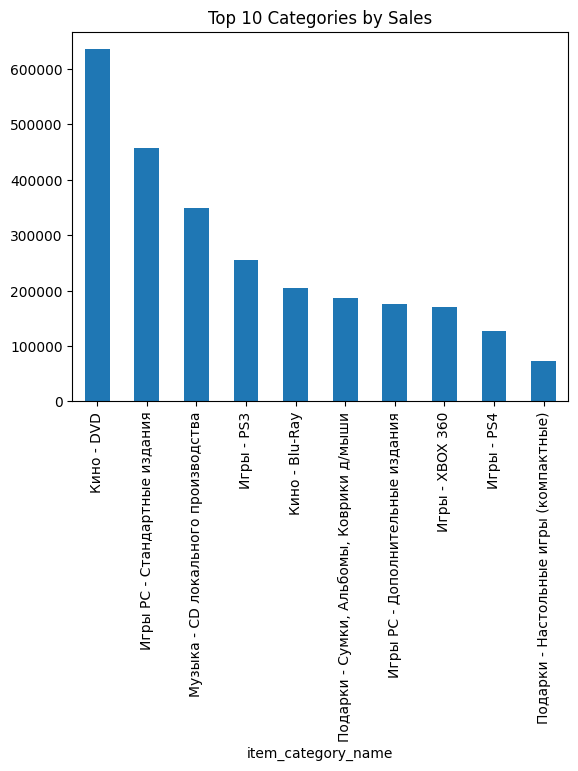

In [8]:
# Top categories by sales
cat_sales = item_cat_sales.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
cat_sales.plot(kind='bar', title='Top 10 Categories by Sales')
plt.show()


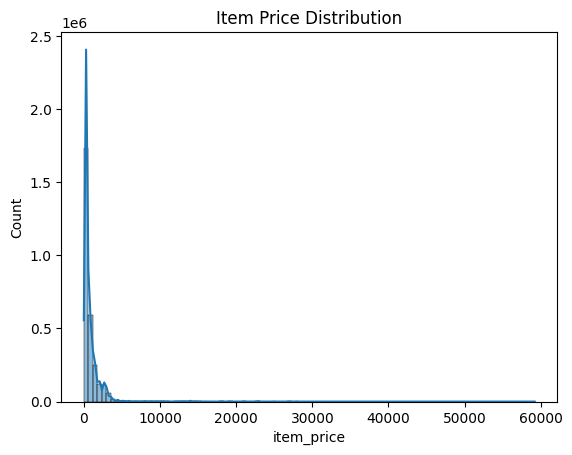

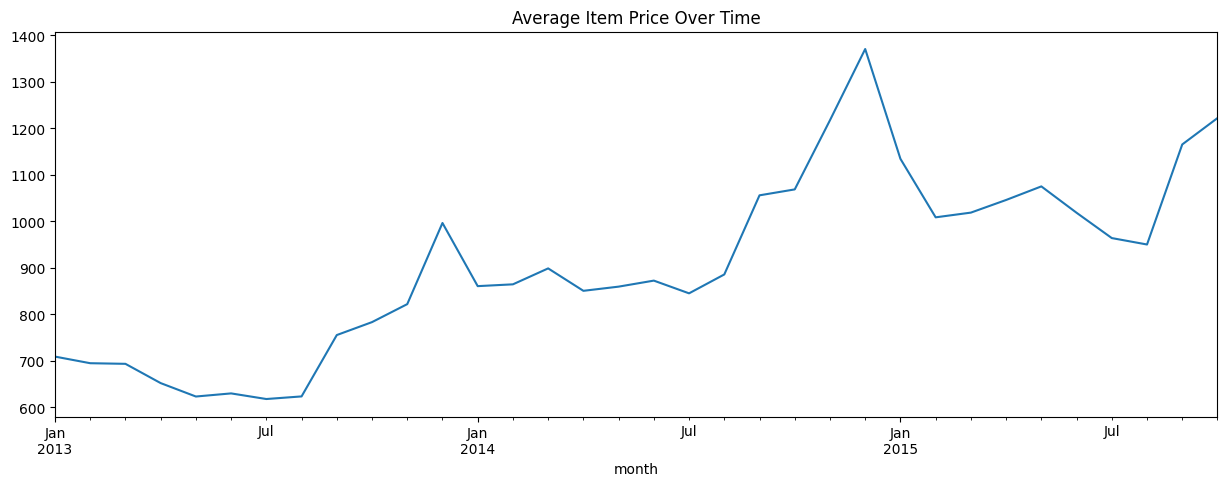

In [9]:
# Price distribution
sns.histplot(sales['item_price'], bins=100, kde=True)
plt.title('Item Price Distribution')
plt.show()

# Average price trend
avg_price_month = sales.groupby('month')['item_price'].mean()
avg_price_month.plot(figsize=(15,5), title='Average Item Price Over Time')
plt.show()


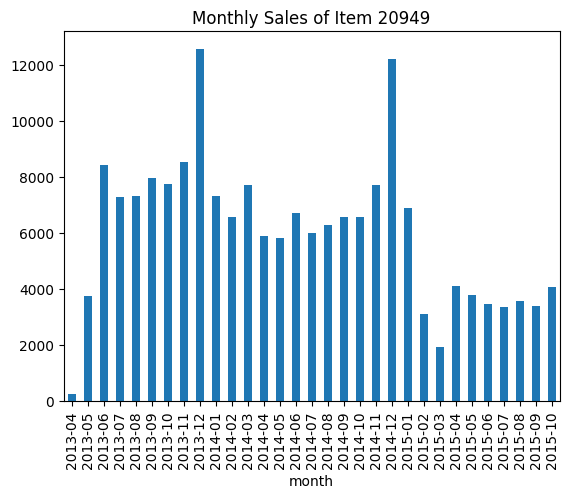

In [10]:
# Monthly sales of a popular item
popular_item = top_items.index[0]
item_data = sales[sales['item_id'] == popular_item]
monthly_item_sales = item_data.groupby('month')['item_cnt_day'].sum()
monthly_item_sales.plot(kind='bar', title=f'Monthly Sales of Item {popular_item}')
plt.show()



In [11]:
# Aggregate sales to monthly level for modeling
monthly_sales_df = sales.groupby(['month', 'shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()
monthly_sales_df.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)
monthly_sales_df.to_csv('../data/processed/monthly_sales.csv', index=False)
